In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import src.data_cleaning as dc

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# defining the 4 dataframes from our .py file

df_sales, df_resbldg, df_parcel, df_lookup = dc.create_dfs('EXTR_RPSale.csv', 
                                                           'EXTR_ResBldg.csv', 
                                                           'EXTR_Parcel.csv',
                                                           'EXTR_LookUp.csv')

/Users/kyledecember1/opt/anaconda3/envs/kh-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/kyledecember1/opt/anaconda3/envs/kh-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


##### 


In [ ]:
# filter for sales from 2019

df_sales_2019 = dc.sales_2019(df_sales)

In [ ]:
# combine major + minor to create HID column

df_sales_2019['HID'] = (df_sales_2019['Major'].astype(str)).str.zfill(6) + '-' + (df_sales_2019['Minor'].astype(str)).str.zfill(4)
df_resbldg['HID'] = (df_resbldg['Major'].astype(str)).str.zfill(6) + '-' + (df_resbldg['Minor'].astype(str)).str.zfill(4)
df_parcel['HID'] = (df_parcel['Major'].astype(str)).str.zfill(6) + '-' + (df_parcel['Minor'].astype(str)).str.zfill(4)

In [ ]:
#retain only relevant columns for df_sales_2019

columns = ['Major', 'Minor', 'DocumentDate', 'SalePrice', 'PropertyType', 'HID']
df_sales_2019 = df_sales_2019.loc[:, columns]

In [ ]:
# new column for whether or not the location is waterfront property

df_parcel['waterfront'] = df_parcel['WfntLocation'] > 0

In [ ]:
df_parcel['AirportNoise'].unique()

In [ ]:
# new column for whether or not there are power lines
df_parcel['pwrlines'] = df_parcel['PowerLines'] == 'Y'

# new column for whether or not there is some other nusiance
df_parcel['othernuisance'] = df_parcel['OtherNuisances'] == 'Y'

In [ ]:
# new column summing integer values corresponding to nuisances **pwrlines and othernuisance will be 1 for true
# and 0 for false
df_parcel['nuisance_total'] = (
    df_parcel['AirportNoise'] +
    df_parcel['TrafficNoise'] +
    df_parcel['pwrlines'] +
    df_parcel['othernuisance']
)

In [ ]:
df_parcel['nuisance_bool'] = df_parcel['nuisance_total'] > 0

In [ ]:
df_parcel['nuisance_bool']

In [ ]:
df_combined = df_sales_2019.merge(df_parcel, how='inner', on='HID')
df_combined = df_combined.merge(df_resbldg, how='inner', on='HID')

In [ ]:
df_combined

In [ ]:
df_resbldg.columns

In [ ]:
columns = ['SalePrice', 'SqFtTotLiving', 'NbrLivingUnits', 'Stories']
df = df_combined[columns]
df.corr()

In [ ]:
df_master.corr()['SalePrice'].sort_values(ascending=False)[0:5]

# post-refactoring function tests

In [4]:
# filter for sales from 2019
df_sales_2019 = dc.sales_2019(df_sales)

In [5]:
df_sales_2019 = dc.add_hid(df_sales_2019)
df_resbldg = dc.add_hid(df_resbldg)
df_parcel = dc.add_hid(df_parcel)

/Users/kyledecember1/mod_2/project/king_county_housing_analysis/src/data_cleaning.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HID'] = (df['Major'].astype(str)).str.zfill(6) + '-' + (df['Minor'].astype(str)).str.zfill(4)


In [6]:
df_sales_2019 = dc.clean_sales(df_sales_2019)

In [7]:
#clean parcel
df_parcel = dc.clean_parcel(df_parcel)

In [8]:
df_master = dc.join_dfs(df_sales_2019, df_parcel, df_resbldg)

In [47]:
df_master = dc.clean_master(df_master)

In [48]:
df_resbldg.columns

Index(['Major', 'Minor', 'BldgNbr', 'NbrLivingUnits', 'Address',
       'BuildingNumber', 'Fraction', 'DirectionPrefix', 'StreetName',
       'StreetType', 'DirectionSuffix', 'ZipCode', 'Stories', 'BldgGrade',
       'BldgGradeVar', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
       'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtUnfinHalf', 'SqFtTotLiving',
       'SqFtTotBasement', 'SqFtFinBasement', 'FinBasementGrade',
       'SqFtGarageBasement', 'SqFtGarageAttached', 'DaylightBasement',
       'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck', 'HeatSystem',
       'HeatSource', 'BrickStone', 'ViewUtilization', 'Bedrooms',
       'BathHalfCount', 'Bath3qtrCount', 'BathFullCount', 'FpSingleStory',
       'FpMultiStory', 'FpFreestanding', 'FpAdditional', 'YrBuilt',
       'YrRenovated', 'PcntComplete', 'Obsolescence', 'PcntNetCondition',
       'Condition', 'AddnlCost', 'HID'],
      dtype='object')

In [11]:
df_parcel.columns

Index(['Major', 'Minor', 'PropName', 'PlatName', 'PlatLot', 'PlatBlock',
       'Range', 'Township', 'Section', 'QuarterSection', 'PropType', 'Area',
       'SubArea', 'SpecArea', 'SpecSubArea', 'DistrictName', 'LevyCode',
       'CurrentZoning', 'HBUAsIfVacant', 'HBUAsImproved', 'PresentUse',
       'SqFtLot', 'WaterSystem', 'SewerSystem', 'Access', 'Topography',
       'StreetSurface', 'RestrictiveSzShape', 'InadequateParking',
       'PcntUnusable', 'Unbuildable', 'MtRainier', 'Olympics', 'Cascades',
       'Territorial', 'SeattleSkyline', 'PugetSound', 'LakeWashington',
       'LakeSammamish', 'SmallLakeRiverCreek', 'OtherView', 'WfntLocation',
       'WfntFootage', 'WfntBank', 'WfntPoorQuality', 'WfntRestrictedAccess',
       'WfntAccessRights', 'WfntProximityInfluence', 'TidelandShoreland',
       'LotDepthFactor', 'TrafficNoise', 'AirportNoise', 'PowerLines',
       'OtherNuisances', 'NbrBldgSites', 'Contamination', 'DNRLease',
       'AdjacentGolfFairway', 'AdjacentGreenbelt', 

In [30]:
df_lookup[df_lookup['LUType'] == 54]

,LUType,LUItem,LUDescription
981,54,1,UPLANDS ONLY ...
982,54,2,UPLANDS WITH TIDELANDS/SHORELANDS ...
983,54,3,TIDELANDS/SHORELANDS ONLY ...


In [13]:
df_master.corr()['SalePrice'].sort_values(ascending=True)[0:10]

LevyCode         -0.064743
Access           -0.060861
FpFreestanding   -0.054539
HeatSource       -0.042233
Condition        -0.040312
SubArea          -0.036108
Area             -0.033877
Major_y          -0.033433
Major            -0.033433
pwrlines         -0.018672
Name: SalePrice, dtype: float64

In [14]:
df_master.corr()['SalePrice'].sort_values(ascending=False)[0:20]

SalePrice            1.000000
SqFtTotLiving        0.587458
BldgGrade            0.585183
LakeWashington       0.400011
SqFt1stFloor         0.378164
SqFt2ndFloor         0.360103
TidelandShoreland    0.357000
Township             0.338378
Territorial          0.319838
waterfront           0.309146
BathFullCount        0.302935
WfntLocation         0.277178
SqFtFinBasement      0.268744
SqFtOpenPorch        0.257631
SqFtTotBasement      0.248318
Bedrooms             0.244816
Stories              0.240688
WfntBank             0.232639
Bath3qtrCount        0.221987
FinBasementGrade     0.221399
Name: SalePrice, dtype: float64

## Model 1

In [55]:
dependent = ['SalePrice']
features = ['SqFtTotLiving']

desired_cols = dependent + features

df_model = df_master[desired_cols].copy()
df_model.dropna(inplace=True)

y = df_model[dependent]
x = df_model[features]

model1 = sm.OLS(y, sm.add_constant(x)).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                 1.034e+04
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:38:00   Log-Likelihood:            -2.8469e+05
No. Observations:               19615   AIC:                         5.694e+05
Df Residuals:                   19613   BIC:                         5.694e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6894.9359   8527.177      0.809      0.419   -9819.055    2.36e+04
SqFtTotLiving   370.3424      3.643    101.663      0.000     363.202     377.483
==============================================================================
Omnibus:                    28637.505   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27494422.447
Skew:                           8.467   Prob(JB):                         0.00
Kurtosis:                     185.631   Cond. No.                     5.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

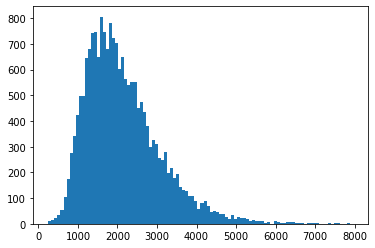

In [16]:
fig, ax = plt.subplots()
ax.hist(df_model['SqFtTotLiving'], bins=100);

In [42]:
df_model['SqFtTotLiving'].sort_values(ascending=True)

7400      250
5817      300
24538     300
22689     300
23596     300
         ... 
14026    5283
14025    5283
26626    5520
4225     5673
12621    6540
Name: SqFtTotLiving, Length: 15703, dtype: int64

## Model 2

In [61]:
dependent = ['SalePrice']
features = ['nuisance']

desired_cols = dependent + features

df_model2 = df_master[desired_cols].copy()
df_model2.dropna(inplace=True)

y = df_model2[dependent]
x = df_model2[features]

# print (dc.vif_test(df_model2, features))
model2 = sm.OLS(y, sm.add_constant(x)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                  0.001305
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.971
Time:                        15:26:51   Log-Likelihood:            -2.8884e+05
No. Observations:               19615   AIC:                         5.777e+05
Df Residuals:                   19613   BIC:                         5.777e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.987e+05   4716.203    169.343      0.000    7.89e+05    8.08e+05
nuisance    -411.4822   1.14e+04     -0.036      0.971   -2.27e+04    2.19e+04
==============================================================================
Omnibus:                    24846.107   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9329915.649
Skew:                           6.679   Prob(JB):                         0.00
Kurtosis:                     109.006   Cond. No.                         2.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
dependent = ['SalePrice']
features = ['SqFtTotLiving', 'LakeWashington', 'waterfront', 'SqFtOpenPorch', '']

desired_cols = dependent + features

df_model2 = df_master[desired_cols].copy()
df_model2.dropna(inplace=True)

y = df_model2[dependent]
x = df_model2[features]

# print (dc.vif_test(df_model2, features))
model2 = sm.OLS(y, sm.add_constant(x)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     3557.
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:27:10   Log-Likelihood:            -2.8251e+05
No. Observations:               19615   AIC:                         5.650e+05
Df Residuals:                   19609   BIC:                         5.651e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.483e+04   7972.623      5.623      0.000    2.92e+04    6.05e+04
SqFtTotLiving    324.5572      3.542     91.637      0.000     317.615     331.499
LakeWashington  3.791e+05   8000.462     47.390      0.000    3.63e+05    3.95e+05
waterfront      8.613e+05   2.54e+04     33.870      0.000    8.11e+05    9.11e+05
SqFtOpenPorch    197.1002     22.626      8.711      0.000     152.751     241.450
nuisance        4.467e+04   8278.348      5.396      0.000    2.84e+04    6.09e+04
==============================================================================
Omnibus:                    24706.271   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         16901858.682
Skew:                           6.360   Prob(JB):                         0.00
Kurtosis:                     146.243   Cond. No.                     1.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
features = ['SqFtTotLiving', 'LakeWashington', 'waterfront', 'SqFtOpenPorch', 'nuisance']

df_model_test, model_test = dc.create_model(dependent, features, df_master)

print(dc.vif_test(df_model_test, features))
print('')

model_test.summary()

        VIF         feature
0  1.593199   SqFtTotLiving
1  1.137954  LakeWashington
2  1.121946      waterfront
3  1.403765   SqFtOpenPorch
4  1.142317        nuisance



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     3557.
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:36:13   Log-Likelihood:            -2.8251e+05
No. Observations:               19615   AIC:                         5.650e+05
Df Residuals:                   19609   BIC:                         5.651e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.483e+04   7972.623      5.623      0.000    2.92e+04    6.05e+04
SqFtTotLiving    324.5572      3.542     91.637      0.000     317.615     331.499
LakeWashington  3.791e+05   8000.462     47.390      0.000    3.63e+05    3.95e+05
waterfront      8.613e+05   2.54e+04     33.870      0.000    8.11e+05    9.11e+05
SqFtOpenPorch    197.1002     22.626      8.711      0.000     152.751     241.450
nuisance        4.467e+04   8278.348      5.396      0.000    2.84e+04    6.09e+04
==============================================================================
Omnibus:                    24706.271   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         16901858.682
Skew:                           6.360   Prob(JB):                         0.00
Kurtosis:                     146.243   Cond. No.                     1.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,VIF,feature
0,10.371790,SqFtTotLiving
1,10.250762,BldgGrade
2,1.046782,LakeWashington


In [46]:
df_parcel['AirportNoise'].value_counts()

0     613945
60        87
59        62
64        59
61        47
62        40
63        36
65        17
66        14
67        11
68         9
70         5
69         3
50         1
1          1
Name: AirportNoise, dtype: int64